In [57]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic)
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지


In [58]:
# api 
import FinanceDataReader as fdr

kospi = fdr.DataReader(symbol='KS11', start='2022') # KS000011

In [59]:
global_day_list = [
    5,20,60,120
]
col_name = f'rolling_'

In [60]:
for day in global_day_list:
    kospi[col_name+str(day)] =  kospi['Close'].rolling(window=day).mean()
kospi.head()

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap,rolling_5,rolling_20,rolling_60,rolling_120
Date,,,,,,,,,,,,,,
2022-01-03,2998.32,3010.77,2979.42,2988.77,435825854,0.0037,1,11.12,8193887264228,2211373367405162,NaN,NaN,NaN,NaN
2022-01-04,2991.97,2995.25,2973.08,2989.24,621549385,0.0002,1,0.47,9991473942836,2212087919930193,NaN,NaN,NaN,NaN
2022-01-05,2984.05,2986.20,2936.73,2953.97,787346121,-0.0118,2,-35.27,15428422516445,2186715367040906,NaN,NaN,NaN,NaN
2022-01-06,2925.40,2952.54,2915.38,2920.53,786045066,-0.0113,2,-33.44,13297135242112,2162437324139180,NaN,NaN,NaN,NaN
2022-01-07,2933.78,2959.03,2933.10,2954.89,546172478,0.0118,1,34.36,10582421237357,2187560533655431,2961.48,NaN,NaN,NaN


In [61]:
def min_max(series):
    """최소값과 최대값의 날짜를 문자열로 반환하는 함수"""
    min_idx = series.idxmin()
    max_idx = series.idxmax()
    return min_idx.strftime('%Y-%m-%d'), max_idx.strftime('%Y-%m-%d')


In [62]:
for day in global_day_list:
    min_close, max_close = min_max(kospi[col_name+str(day)])
    print(f'{col_name+str(day)} : ({min_close}, {max_close})')

rolling_5 : (2022-10-05, 2022-01-07)
rolling_20 : (2022-10-25, 2022-01-28)
rolling_60 : (2022-11-29, 2022-04-01)
rolling_120 : (2023-02-27, 2024-08-02)


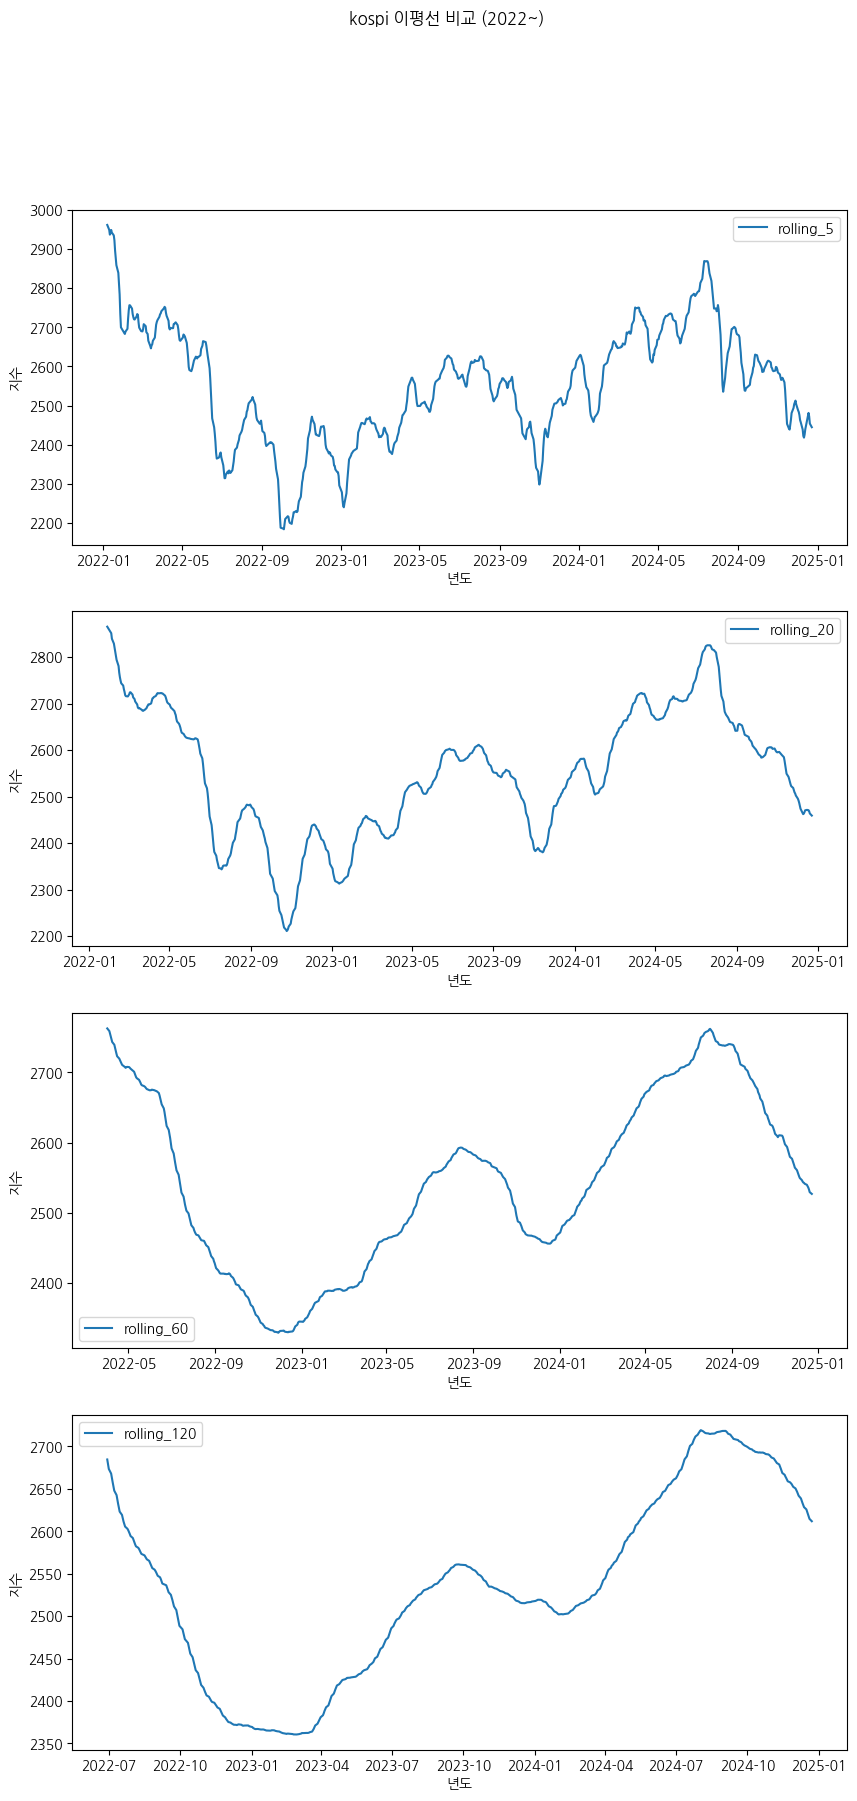

In [63]:
# fig, axes = plt.subplots(2,2,figsize=(14,10)) # 외곽 사이즈

fig, axes = plt.subplots(4,1,figsize=(10,20), dpi=100) # 외곽 사이즈

fig.suptitle('kospi 이평선 비교 (2022~)')

# 그래프 그리기

for idx, day in enumerate(global_day_list, 0):
    axes[idx].plot(kospi.index, kospi[col_name+str(day)], label=f'{col_name+str(day)}')
    axes[idx].set_xlabel('년도')
    axes[idx].set_ylabel(f'지수')
    axes[idx].legend()

# plt.tight_layout()
plt.show()


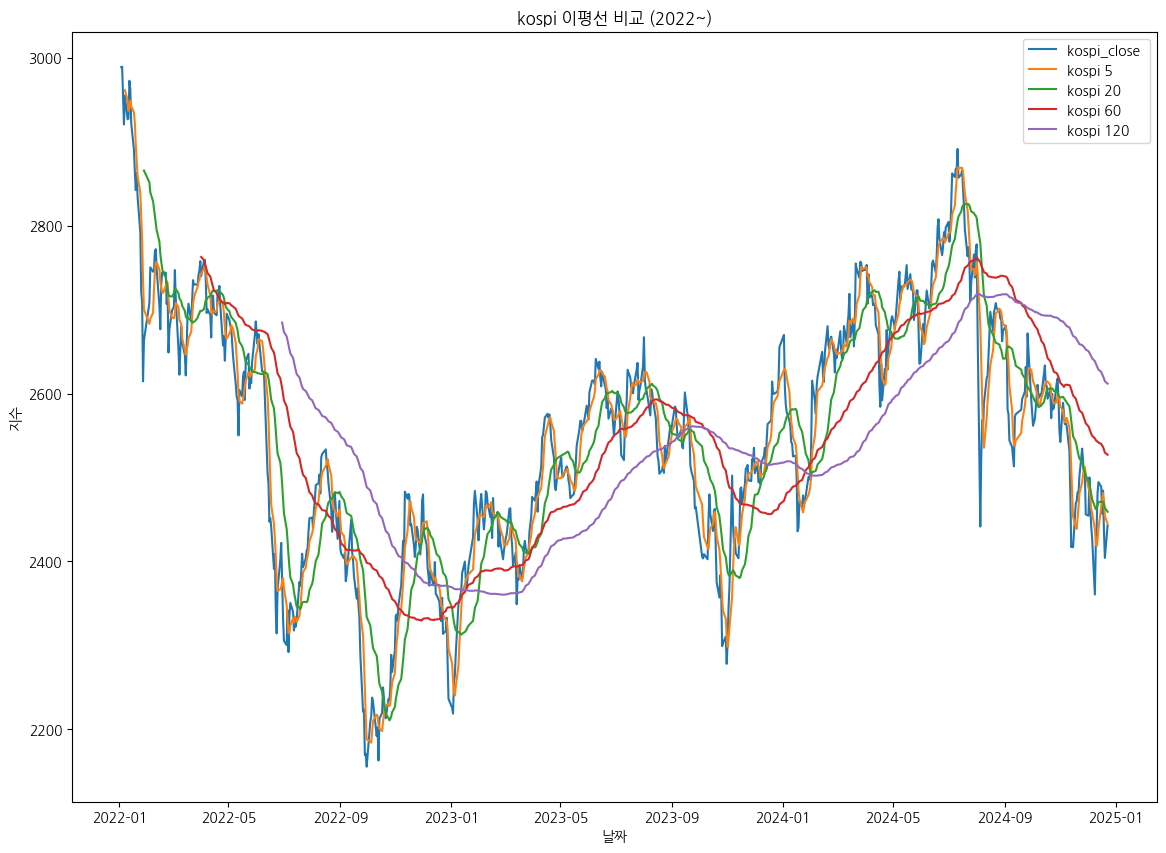

In [64]:
plt.figure(figsize=(14,10), dpi=100)
plt.plot(kospi.index, kospi['Close'], label='kospi_close ') 
plt.plot(kospi.index, kospi['rolling_5'] , label='kospi 5') 
plt.plot(kospi.index, kospi['rolling_20'] , label='kospi 20') 
plt.plot(kospi.index, kospi['rolling_60'] , label='kospi 60') 
plt.plot(kospi.index, kospi['rolling_120'] , label='kospi 120') 

plt.title('kospi 이평선 비교 (2022~)')
plt.xlabel('날짜')
plt.ylabel('지수')
plt.legend()
plt.show()